# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

homeo_method = 'HEH'
tag = 'autoencoder'
# tag = 'independance'

matname = tag +'_' + homeo_method

nb_quant = 128
nb_quant = 256
C = 5.
eta_homeo=0.05
alpha_homeo=0.02
do_double_shuffle = True
do_double_shuffle = False
do_random = True

n_iter = 2**13 + 1

record_num_batches = 2**11
N_show = 120
max_patches = 10
seed = 42
np.random.seed(seed)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=n_iter, 
            homeo_method=homeo_method, eta_homeo=eta_homeo, alpha_homeo=alpha_homeo, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)


In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname=tag)

Extracting data..No cache found data_cache/autoencoder_data: Extracting data... Extracting data..Photo2018-01-18_0440462510.jpg, Photo2018-01-18_0309392473.jpg, Photo2018-01-18_0343102547.jpg, Photo2018-02-18_0911262631 square.jpg, Photo2018-01-18_0327052545.jpg, Photo2018-01-18_0440352508.jpg, Photo2018-01-18_0230432458.jpg, Photo2018-01-18_0316462527.jpg, Photo2018-01-18_0553172551.jpg, Photo2018-01-18_0423102502.jpg, Photo2018-01-18_0422432500.jpg, Photo2018-01-18_0441022511.jpg, Data is of shape : (262140, 144) - done in 118.85s.
Data is of shape : (262140, 144) - done in 119.74s.


In [5]:
!ls -l {shl.data_cache}/{tag}*
!rm -fr {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  301985408 Feb 23 16:01 data_cache/autoencoder_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (262140, 144)
average of patches =  1.4578306989484052e-05  +/-  0.006638689828201611
average energy of data =  0.029647154513547106 +/- 0.03759209103599952


In [7]:
l0_sparseness = shl.l0_sparseness
l0_sparseness_noise = 200 #shl.n_dictionary #
#l0_sparseness_high = shl.l0_sparseness * 2
shl.do_precision

False

In [8]:
stick = np.arange(shl.n_dictionary)*nb_quant

indx = np.random.permutation(data.shape[0])[:record_num_batches]
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/autoencoder_HEH_dico.pkl: Learning the dictionary with algo = mp 
 Training on 262140 patches
Iteration   1 /   8193 (elapsed time:   5s,   0mn   5s)
Iteration  129 /   8193 (elapsed time:  672s,  11mn  12s)
Iteration  257 /   8193 (elapsed time:  1317s,  21mn  57s)
Iteration  385 /   8193 (elapsed time:  1959s,  32mn  39s)
Iteration  513 /   8193 (elapsed time:  2638s,  43mn  58s)
Iteration  641 /   8193 (elapsed time:  3284s,  54mn  44s)
Iteration  769 /   8193 (elapsed time:  3928s,  65mn  28s)
Iteration  897 /   8193 (elapsed time:  4571s,  76mn  11s)
Iteration  1025 /   8193 (elapsed time:  5221s,  87mn   1s)
Iteration  1153 /   8193 (elapsed time:  5860s,  97mn  40s)
Iteration  1281 /   8193 (elapsed time:  6583s,  109mn  43s)
Iteration  1409 /   8193 (elapsed time:  7751s,  129mn  11s)
Iteration  1537 /   8193 (elapsed time:  8921s,  148mn  41s)
Iteration  1665 /   8193 (elapsed time:  10074s,  167mn  54s)
Iteration  1793 /   8193 (elapsed time:  11247s

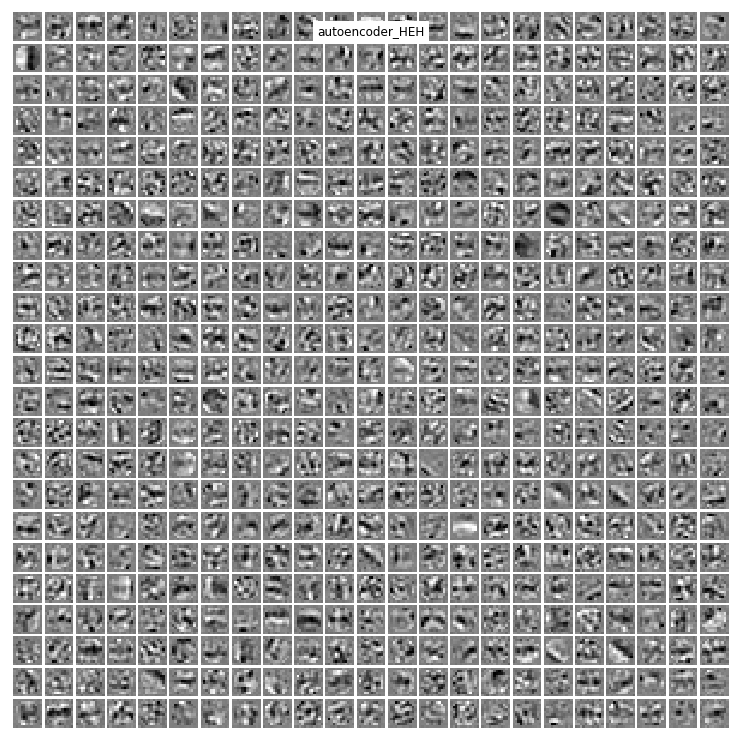

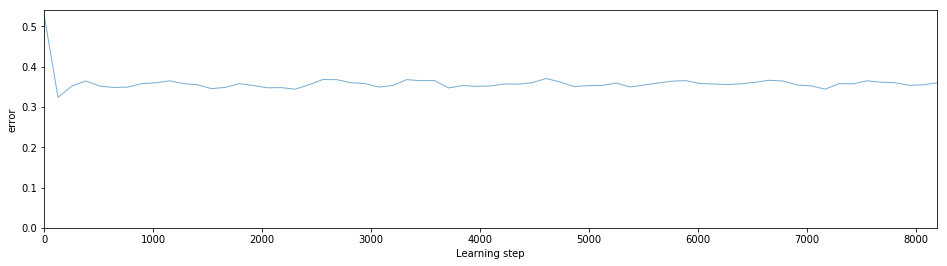

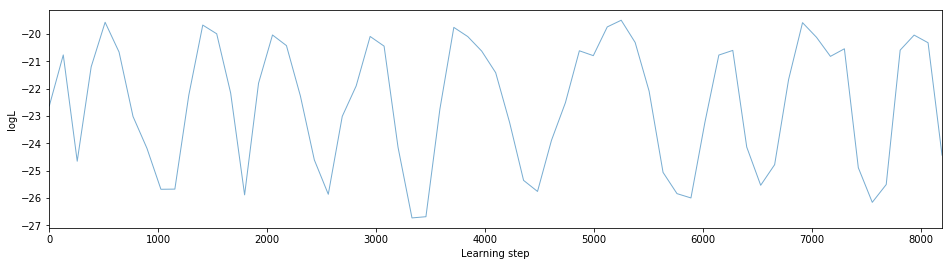

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL']

dico_homeo = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico_homeo.dictionary.shape)
print('average of filters = ',  dico_homeo.dictionary.mean(axis=1).mean(), 
      '+/-',  dico_homeo.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico_homeo.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (529, 144)
average of filters =  -0.0009669966125640178 +/- 0.010327960758682784
average energy of filters =  1.0 +/- 8.276677990064024e-17


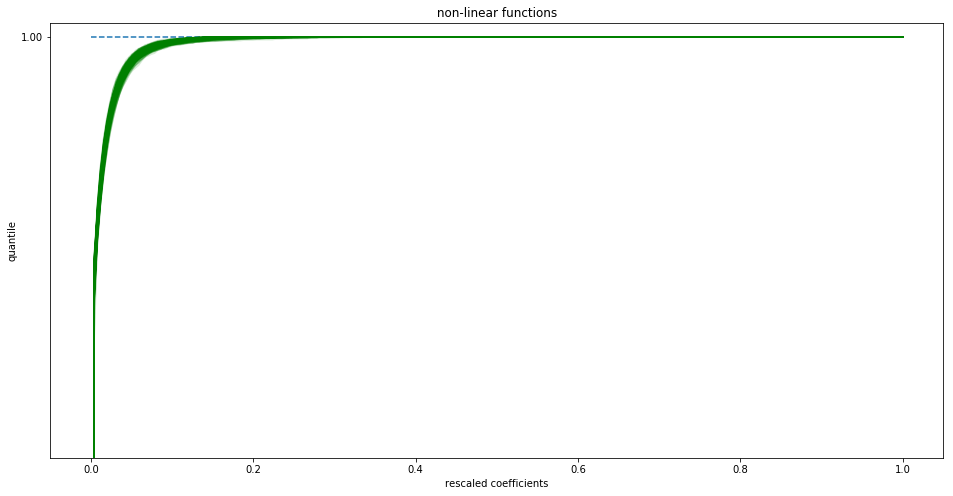

In [11]:
if not dico_homeo.P_cum is None: 
    from shl_scripts.shl_tools import plot_P_cum
    fig, ax = plot_P_cum(dico_homeo.P_cum, verbose=False, alpha=.15);
    ax.set_ylim(0.97, 1.001)
    #ax.set_xmargin(0.);

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [12]:
from shl_scripts.shl_tools import show_data
def print_stats(data, dictionary, sparse_code):
    print(42*'🐒')
    patches = sparse_code @ dictionary
    error = data - patches

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('average std of codewords = ', sparse_code.std())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    print('number of codes, size of reconstructed images = ', patches.shape)

    plt.matshow(sparse_code[:N_show, :])
    plt.show()
    fig, axs = show_data(data[:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    #print('average gain of coding = ', data[indx, :].std()/error.std())  
    
    return SD, SE

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 529)
average of codewords =  0.002206247479887466
average std of codewords =  0.02385859196641734
l0-sparseness of codewords =  0.028288006557183366  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0014498174803699944
number of codes, size of reconstructed images =  (2048, 144)


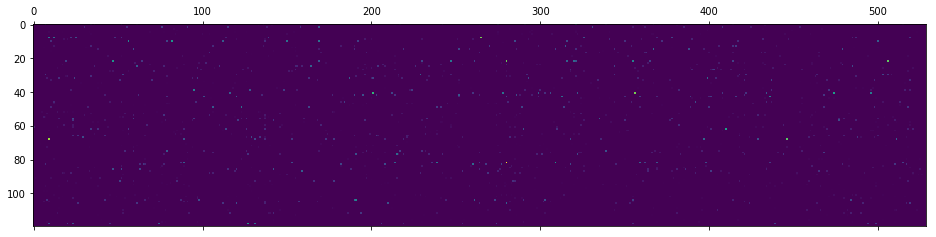

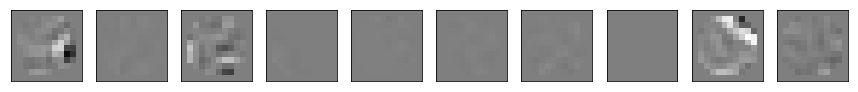

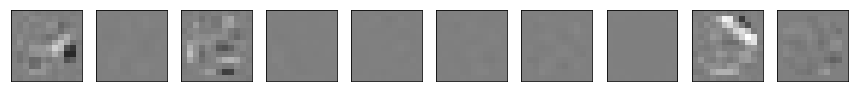

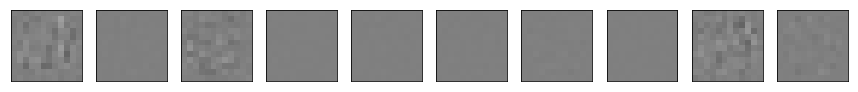

average of data patches =  -0.00015607221879495106 +/- 0.006286712584997908
average of residual patches =  -9.302273323796562e-05 +/- 0.0013797114423691464
median energy of data =  0.01888923982255844
average energy of data =  0.030657163651197042 +/- 0.03820734098428961
average energy of residual =  0.01077573654341014 +/- 0.013402651111184652
median energy of residual =  0.006602811236225527
average gain of coding =  3.115044489050036 +/- 0.9435592821758737
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 529)
average of codewords =  0.002206247479887466
average std of codewords =  0.02385859196641734
l0-sparseness of codewords =  0.028288006557183366  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0014498174803699942
number of codes, size of reconstructed images =  (2048, 144)


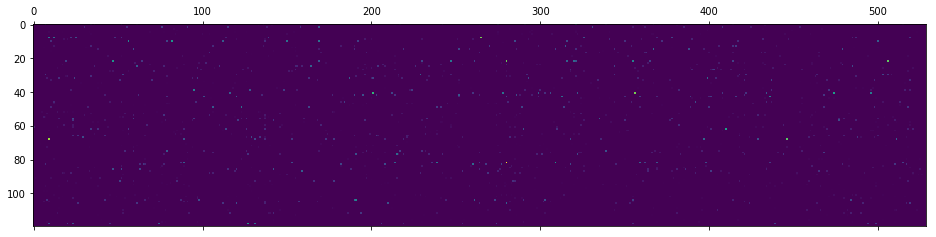

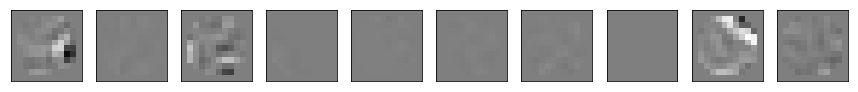

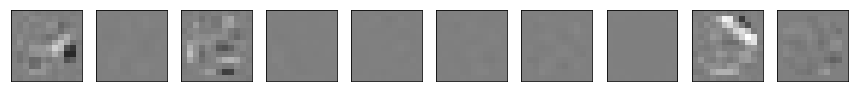

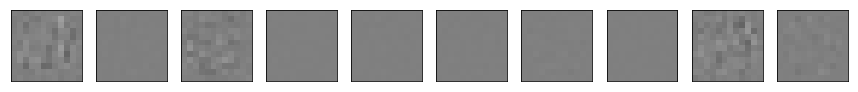

average of data patches =  -0.00015607221879495106 +/- 0.006286712584997908
average of residual patches =  -9.302273323796593e-05 +/- 0.0013797114423691464
median energy of data =  0.01888923982255844
average energy of data =  0.030657163651197042 +/- 0.03820734098428961
average energy of residual =  0.01077573654341014 +/- 0.013402651111184652
median energy of residual =  0.006602811236225528
average gain of coding =  3.115044489050036 +/- 0.9435592821758736
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 529)
average of codewords =  0.002214177834519741
average std of codewords =  0.02374313433590015
l0-sparseness of codewords =  0.02827600720699433  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0014509430809438583
number of codes, size of reconstructed images =  (2048, 144)


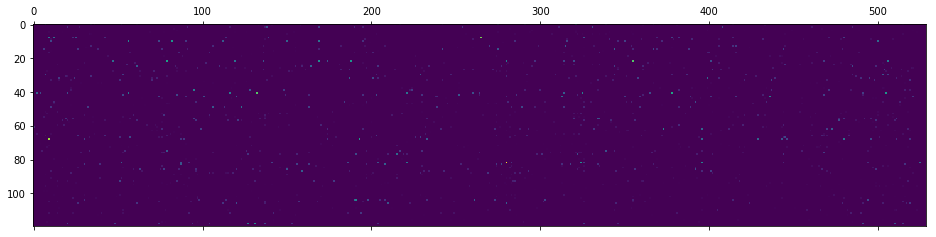

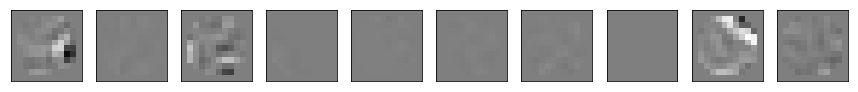

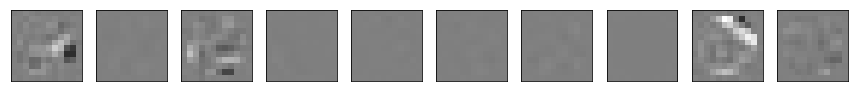

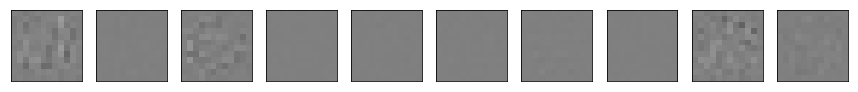

average of data patches =  -0.00015607221879495106 +/- 0.006286712584997908
average of residual patches =  -7.193964843695763e-05 +/- 0.001510698357234119
median energy of data =  0.01888923982255844
average energy of data =  0.030657163651197042 +/- 0.03820734098428961
average energy of residual =  0.011021452555545243 +/- 0.013889066018282999
median energy of residual =  0.006829441990096975
average gain of coding =  3.0803524347065547 +/- 0.9435144944396576


In [13]:
from shl_scripts.shl_encode import sparse_encode
if dico_homeo.P_cum is None: 
    gain = np.ones(shl.n_dictionary)
else:
    gain = None
dico_rec = dico_homeo.dictionary

for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico_homeo.P_cum], [np.ones(shl.n_dictionary), None, gain]):
    sparse_code = sparse_encode(data[indx, :], dico_rec, P_cum=P_cum_rec, C=C, 
                                 l0_sparseness=l0_sparseness, gain=gain_rec)   

    SD, SE = print_stats(data[indx, :], dico_homeo.dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

average non-zeros [2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048]
average non-zeros [ 18  40  18  10  49  54  44 144 160  73 105 106  40  17 127 118  63  47
  35  76 113  52  57 213  12 107 152  68  15  18  82  23  15  83  64  20
  33  11  80  25  79  12  34  13  15 110   8  28  44  28  21 100 201  97
  21  27  90  27  23 110  25  71  38  98  17  24  85  33  20  70  69  38
  14  56  80  62 144 115  34  86  35  72  18  45  21 131  67  

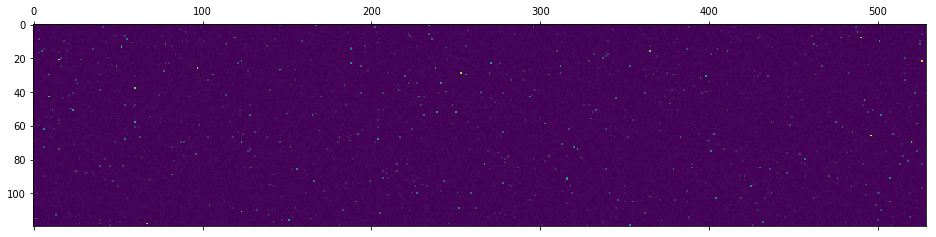

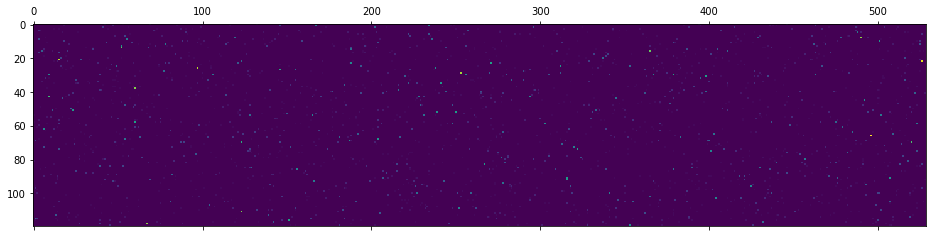

average non-zeros [2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048]
average non-zeros [60 71 59 52 67 55 74 57 55 60 44 61 60 57 46 59 54 56 66 69 62 62 56 60
 51 52 54 51 63 57 62 60 72 55 56 68 66 49 67 60 57 61 61 51 67 52 59 44
 53 59 54 59 64 63 56 65 58 64 58 58 66 48 50 57 61 51 41 62 48 63 55 54
 60 56 53 54 71 54 60 68 58 57 60 60 49 46 55 63 74 58 58 60 54 65 57 54
 62 69 62 46 70 68 54 52 68 74 54 54 63 53 51 62 50 65 52 63 6

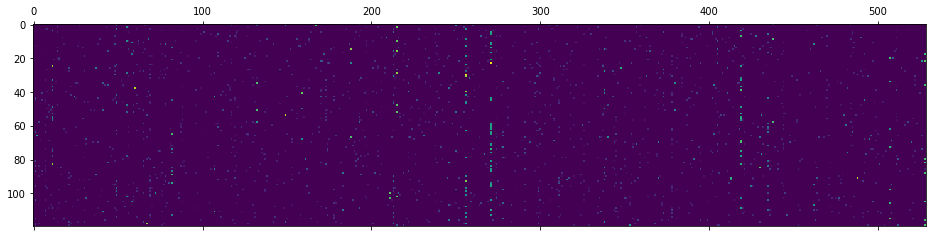

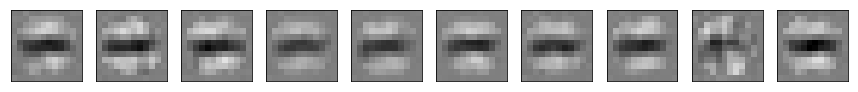

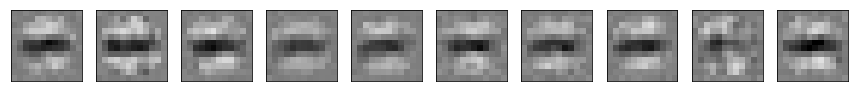

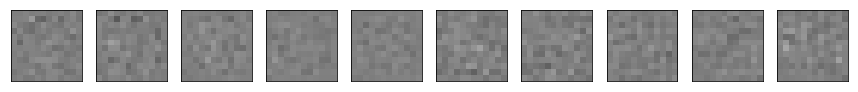

average of data patches =  -0.006004790520336216 +/- 0.005652276951600137
average of residual patches =  -7.389176715389878e-05 +/- 0.002376615926992363
median energy of data =  0.10865134120830885
average energy of data =  0.11194235449904882 +/- 0.019281001326132054
average energy of residual =  0.027683731107246694 +/- 0.00535785704797957
median energy of residual =  0.02751565137643039
average gain of coding =  4.094611417269523 +/- 0.5462801832464016


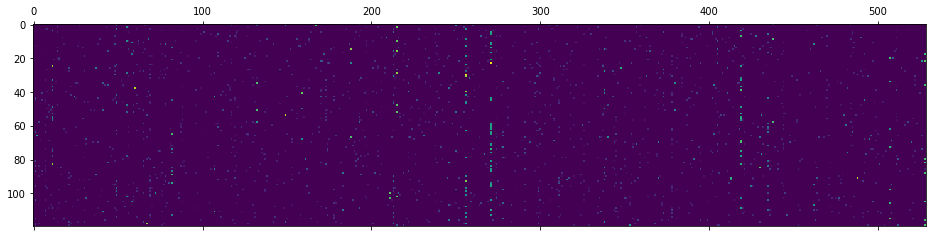

mean deviation of coefficients =  0.011743592476164248 0.0023060873990983673 0.00708059248755765
total deviation of coefficients =  0.008576264646288394
mean deviation of quantiles =  0.007212665346287848
mean deviation of quantiles =  0.007269185195473216
total deviation of quantiles =  0.013392724513546641
ratio deviation of quantiles =  1.8568343144382113
proba incorrect coefficients =  0.9717101473889413
proba incorrect coefficients (strong) =  0.05227747666587901


In [14]:
def shuffling(data, sparse_code, dico):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, P_cum=dico.P_cum, C=C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)


    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code, axis=0)[:N_show])

    print(sparse_code_bar.shape)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    if P_cum_rec is None: 
        gain_rec = np.ones(shl.n_dictionary)
    else:
        gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, P_cum=P_cum_rec, C=C, 
                                     l0_sparseness=l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec)
    
    plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    if not dico.P_cum is None: 
        from shl_scripts.shl_encode import quantile, rescaling

        q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=C), stick, do_fast=False)
        q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=C), stick, do_fast=False)

        print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
        print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
        print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
        print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
        aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))
    else:
        aerror = np.nan

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico_homeo)
record = pipeline(sparse_code_bar, sparse_code_bar_high, dico_homeo, index='homeo')

In [15]:
record

,aerror,error,perror,perror_high
homeo,1.856834,4.094611,0.97171,0.052277


## comparing to the learning without homeostasis

Extracting data..loading the data called : data_cache/autoencoder_data
Data is of shape : (262140, 144) - done in 0.49s.
No cache found data_cache/autoencoder_None_dico.pkl: Learning the dictionary with algo = mp 
 Training on 262140 patches
Iteration   1 /   8193 (elapsed time:   2s,   0mn   2s)
Iteration  129 /   8193 (elapsed time:  65s,   1mn   5s)
Iteration  257 /   8193 (elapsed time:  123s,   2mn   3s)
Iteration  385 /   8193 (elapsed time:  184s,   3mn   4s)
Iteration  513 /   8193 (elapsed time:  244s,   4mn   4s)
Iteration  641 /   8193 (elapsed time:  304s,   5mn   4s)
Iteration  769 /   8193 (elapsed time:  367s,   6mn   7s)
Iteration  897 /   8193 (elapsed time:  428s,   7mn   8s)
Iteration  1025 /   8193 (elapsed time:  491s,   8mn  11s)
Iteration  1153 /   8193 (elapsed time:  553s,   9mn  13s)
Iteration  1281 /   8193 (elapsed time:  615s,  10mn  15s)
Iteration  1409 /   8193 (elapsed time:  675s,  11mn  15s)
Iteration  1537 /   8193 (elapsed time:  739s,  12mn  19s)
It

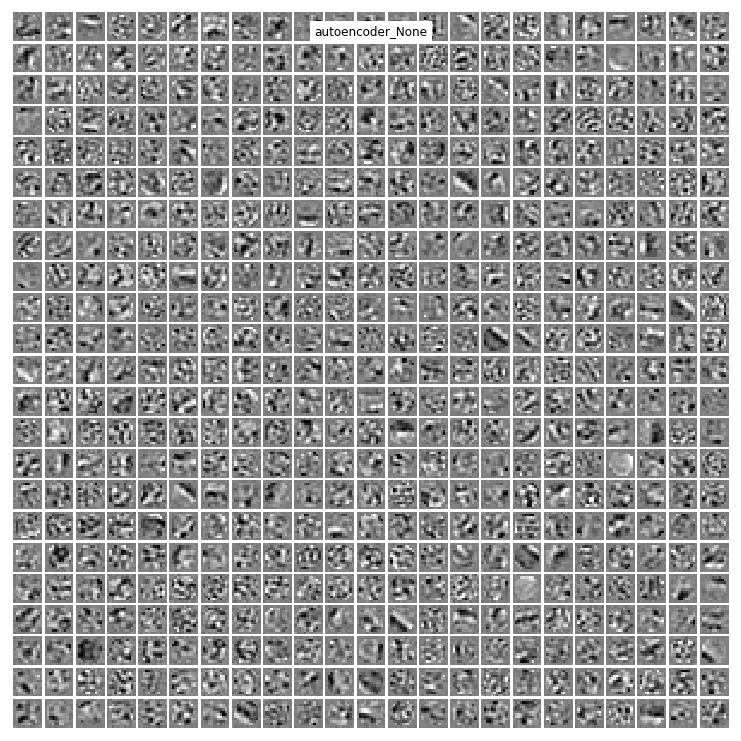

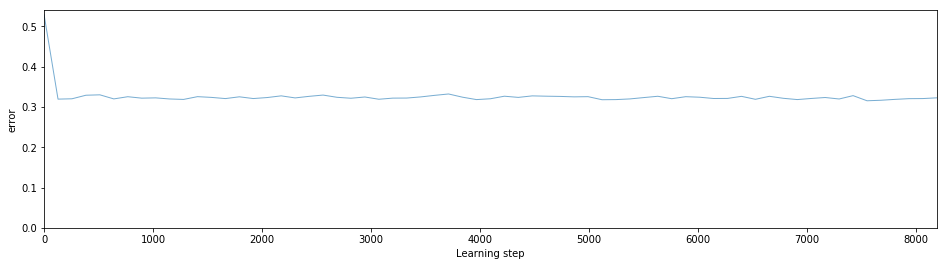

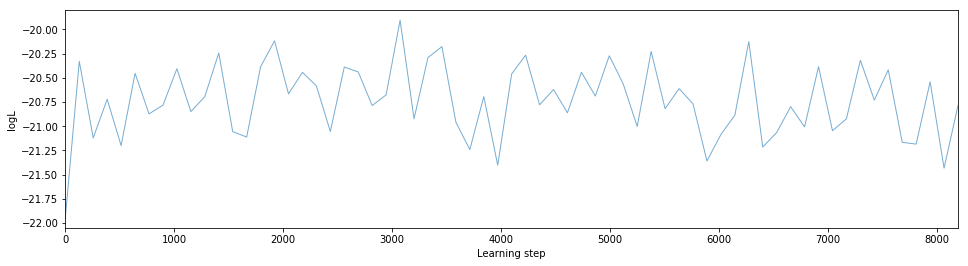

In [16]:
homeo_method = 'None'
matname = tag + '_' + homeo_method

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=n_iter, 
            homeo_method=homeo_method, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl_nohomeo = SHL(**opts)
data = shl_nohomeo.get_data(matname=tag)
dico_nohomeo = shl_nohomeo.learn_dico(data=data, list_figures=list_figures, matname=matname)

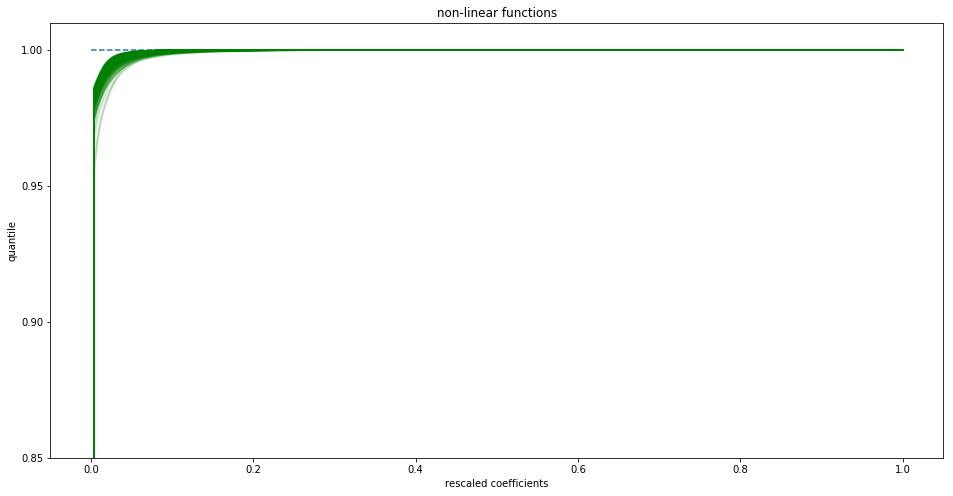

In [17]:
if not dico_nohomeo.P_cum is None: 
    from shl_scripts.shl_tools import plot_P_cum
    fig, ax = plot_P_cum(dico_nohomeo.P_cum, verbose=False, alpha=.15);
    ax.set_ylim(0.85, 1.01)
    #ax.set_xmargin(0.);

### coding


🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (2048, 529)
average of codewords =  0.002232970061143999
average std of codewords =  0.024079040491686694
l0-sparseness of codewords =  0.028331388823251417  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0008480333284680581
number of codes, size of reconstructed images =  (2048, 144)


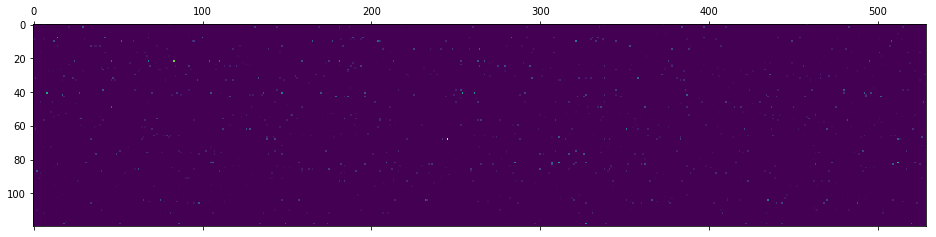

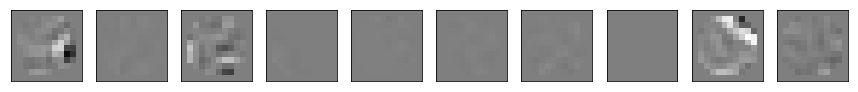

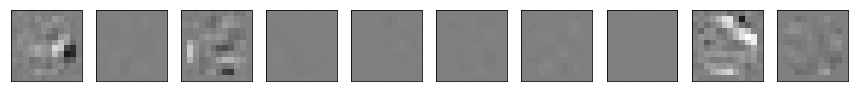

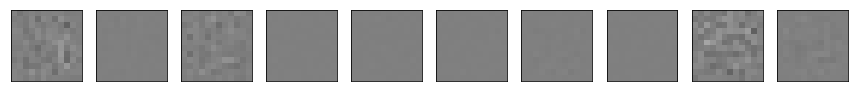

average of data patches =  -0.00015607221879495106 +/- 0.006286712584997908
average of residual patches =  -0.00012260952309528256 +/- 0.001307434151476739
median energy of data =  0.01888923982255844
average energy of data =  0.030657163651197042 +/- 0.03820734098428961
average energy of residual =  0.009992601676723924 +/- 0.012387639000999172
median energy of residual =  0.006263251311491685
average gain of coding =  3.2307014185533025 +/- 0.7410514922659072


(array([0.0718, 0.0054, 0.0562, ..., 0.0395, 0.0092, 0.    ]),
 array([0.0252, 0.0022, 0.0184, ..., 0.0159, 0.0034, 0.    ]))

In [18]:
P_cum_rec = None 
gain_rec = np.ones(shl_nohomeo.n_dictionary)
dico_rec = dico_nohomeo.dictionary

sparse_code = sparse_encode(data[indx, :], dico_rec, P_cum=P_cum_rec, C=C, 
                                 l0_sparseness=l0_sparseness, gain=gain_rec)   

print_stats(data[indx, :], dico_nohomeo.dictionary, sparse_code)

### Generating and shuffling the coefficients

average non-zeros [2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048]
average non-zeros [60 71 59 52 67 55 74 57 55 60 44 61 60 57 46 59 54 56 66 69 62 62 56 60
 51 52 54 51 63 57 62 60 72 55 56 68 66 49 67 60 57 61 61 51 67 52 59 44
 53 59 54 59 64 63 56 65 58 64 58 58 66 48 50 57 61 51 41 62 48 63 55 54
 60 56 53 54 71 54 60 68 58 57 60 60 49 46 55 63 74 58 58 60 54 65 57 54
 62 69 62 46 70 68 54 52 68 74 54 54 63 53 51 62 50 65 52 63 6

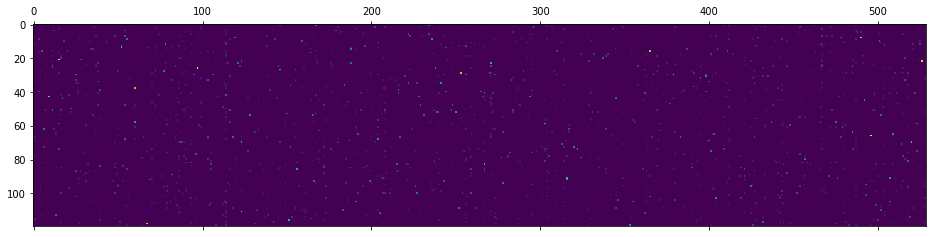

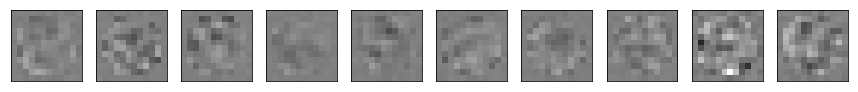

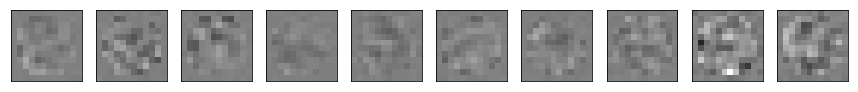

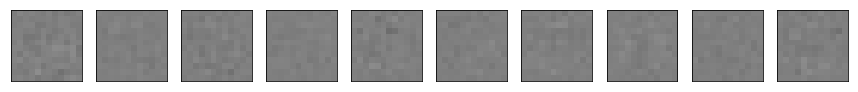

average of data patches =  0.001366754452691 +/- 0.005206714600133442
average of residual patches =  0.00020386986107556244 +/- 0.001032035818487688
median energy of data =  0.03674550722860035
average energy of data =  0.04096820853366368 +/- 0.018618920896151393
average energy of residual =  0.009049122363889802 +/- 0.0024961848126689784
median energy of residual =  0.008509257342599153
average gain of coding =  4.597049438424152 +/- 1.968292778571544


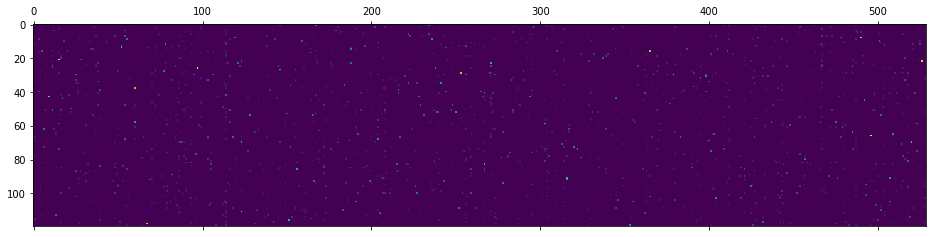

mean deviation of coefficients =  0.011743592476164248 0.0023060873990983673 0.0024681858774522644
total deviation of coefficients =  0.0022251616836102116
mean deviation of quantiles =  0.007213294354571642
mean deviation of quantiles =  0.007192819710293024
total deviation of quantiles =  0.010596853699226494
ratio deviation of quantiles =  1.4690726841766022
proba incorrect coefficients =  0.9718089112712666
proba incorrect coefficients (strong) =  0.04182604265122869


,aerror,error,perror,perror_high
homeo,1.856834,4.094611,0.971710,0.052277
nohomeo,1.469073,4.597049,0.971809,0.041826


In [19]:
pd.concat([record, pipeline(sparse_code_bar, sparse_code_bar_high, dico_nohomeo, index='nohomeo')])

## Version used

In [20]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Sat Feb 24 03:32:35 2018 CET